<span style="font-size: 26px;"><b> «Стримчик», закономерности определяющие успешность игр </b></span> 

Мировой рынок видеоигр с каждым годом растет. Анализ рынка необходим всегда для выявления потенциально популярных продуктов и планнирования рекламных кампаний. В данном проекте предстоит определить закономерности определеяющие успешность игры и дать рекомендации для дальнейшего развития бизнеса.

Для проведения исследования нам предоставлен датасет с историческими данными до 2016 года. Необходимо подготовить исходные данные, исправить названия столбцов, преобразовать типы данных, обработать пропуски и оценить суммарные продажи во всех регионах. Далее будет проведен исследовательскийанализ данных, сделаны промежуточные выводы, выдвинуты гипотезы и сделан общий вывод о критериях успешности игр и выбора стратегии дальнейшего развития бизнеса.

In [1]:
from scipy import stats as st 
from math import sqrt
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

#### Шаг 1. Загрузка данных

Загружаем информацию о пользователях и выводим статистику и данные первых 10 строк

In [2]:
data_users = pd.read_csv('/datasets/games.csv')
data_users.info()
data_users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Датасет состоит из 16715 строк. В датасете присутствуют данные о: названии игр, игровой платформе, годе выхода, жанре, продажах в разных странах, оценках критиков и пользователей и возрастном рейтинге. В колонках с оценками критиков, годом выхода , возрастным рейтингом, названием игр и жанром есть пропуски.

#### Шаг 2. Предобработка данных

Приведем названия столбцов к нижнему регистру для удобства.

In [3]:
data_users.columns = data_users.columns.str.lower()
data_users.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В столбце с оценкой пользователей тип данных object, в отличие от столбца с оценкой критиков. Проверим какие данные есть в столбце user_score.

In [4]:
data_users['user_score'].unique() # выводим уникальные значения столбца user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных помимо числовых отметок и отсутствующих значений, присутствует аббревиатура "tbd", означающая, что информация будет добавлена позднее. Заменим аббревиатура "tbd" на NaN и присвоим тип данных на float.

In [5]:
data_users['user_score'] = data_users['user_score'].replace('tbd', np.nan)
data_users['user_score'] = data_users['user_score'].astype(float) 
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Данные в столбцах Critic_Score и User_Score в разных системах исчисления, стобальной и десятибальной соответственно. 

 Проверим какие данные есть в столбце critic_score.

In [6]:
data_users['critic_score'].unique()# выводим уникальные значения столбца critic_score

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Необычных значений не выявлено.

Изучим отсутствующие значения в столбце названий

In [7]:
data_users[data_users['name'].isna()]# находим строки с пропусками в столбце Name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В названиях всего 2 пропуска, данные строки не несут никакой полезной информации. Удалим данные строчки.

In [8]:
data_users = data_users.dropna(subset=['name'])# удаляем строки с пропусками в столбце Name
data_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Изучим строчки с отсутствующими значениями в столбце года релиза.

In [9]:
data_users[data_users['year_of_release'].isna()].tail(20)# находим строки с пропусками в столбце year_of_release

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15816,Without Warning,XB,NaN,Shooter,0.01,0.00,0.00,0.0,45.0,2.0,M
15953,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.00,0.0,NaN,NaN,NaN
15966,Dinotopia: The Sunstone Odyssey,GC,NaN,Action,0.01,0.00,0.00,0.0,50.0,NaN,T
15998,Jet Impulse,DS,NaN,Simulation,0.00,0.00,0.02,0.0,NaN,NaN,NaN
16017,Dream Dancer,DS,NaN,Misc,0.01,0.00,0.00,0.0,NaN,NaN,E
16059,Dance! It's Your Stage,Wii,NaN,Misc,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16079,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16080,Ferrari: The Race Experience,Wii,NaN,Racing,0.00,0.01,0.00,0.0,54.0,NaN,E
16157,Aquaman: Battle for Atlantis,XB,NaN,Action,0.01,0.00,0.00,0.0,26.0,2.7,T
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.0,65.0,NaN,RP


Cтрочек с отсутствующими значениями в столбце года релиза всего 269, что составляет оклко 1.6 % от размера датасета. Также продажи в данных строчках часто низкие или нулевые, поэтому можно удалить данные строчки из датасета без последствий для дальнейшего анализа.

In [10]:
data_users = data_users.dropna(subset=['year_of_release'])# удаляем строки с пропусками в столбце year_of_release
data_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


<span style="font-size: 14px;"><b>Проверим колонки на наличие неявных дубликатов и приведем к единой системе. </b></span>

Сначала проверим отдельные столбцы на наличие неявных дубликатов, потом комплексно по колонкам названия, года выхода и платформы.

Выведем список уникальных значений возрастного рейтинга и таблицу их упоминаемости.

In [11]:
display(data_users['rating'].unique()) # выводим уникальные значения столбца Rating
data_users.pivot_table(
                        index = ['rating'],
                        values=['name'],
                        aggfunc='count'
                        ).reset_index() # создаем сводную таблицу и сбрасываем индексы

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

,rating,name
0,AO,1
1,E,3921
2,E10+,1393
3,EC,8
4,K-A,3
5,M,1536
6,RP,1
7,T,2905


"RP" это игры ожидающие рейтинга, "AO" является категорией для взрослых, т.к. количество таких игр минимально и не имеет статистического значения, удалим строки с ними. "K-A" это более ранний вариант рейтинга "E", заменим "K-A" на "E". "EC" является категорией для детей младшего возраста и таких игр это менее 0.01 %, прировняем ее к категории "E" (для всех). 

In [12]:
data_users['rating'] = (
    data_users['rating'].str 
    .replace('K-A', 'E') 
    .replace('EC', 'E') 
) # замена значений методом replace()

data_users = data_users[(data_users['rating'] != 'AO') & (data_users['rating'] != 'RP')].reset_index(drop=True)
display(data_users['rating'].unique())
data_users.info()

array(['E', nan, 'M', 'T', 'E10+'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  float64
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7981 non-null   float64
 9   user_score       7461 non-null   float64
 10  rating           9766 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Некоторые дублирующие значения в столбце rating заменены, категории с единичными статистический не значимыми значениями удалены.

Проверим столбец жанров на неявные дубликаты

In [13]:
data_users['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Неявных дубликатов в жанрах нет.

Проверим столбец игровых платформ на неявные дубликаты

In [14]:
data_users['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Неявных дубликатов в игровых платформах нет.

Проверим наличие неявных дубликатов одновременно по имени, платформе и году релиза.

In [15]:
data_users.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

Дубликат один, найдем данные по нему в таблице

In [16]:
data_users[data_users.duplicated(subset=['name', 'platform', 'year_of_release']) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15967,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Продаж по нему практический нет, удалим строчку как статистичесий не значимую.

In [17]:
data_users.drop(15967, inplace=True)
data_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16441
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  float64
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9765 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Проверим сколько возрастных категорий может быть у одной игры.

In [18]:
nan_count = data_users.pivot_table(

                        index=['name'],
                        columns =['rating'],
                        values=['platform'],
                        aggfunc='count'

).notnull()

nan_count['count_catagory'] = nan_count[nan_count.columns.tolist()].sum(axis=1)
display(nan_count[nan_count['count_catagory'] > 1].head())
print('Список уникального максимального количества категорий для одной игры:', nan_count['count_catagory'].unique())

platform                      count_catagory
rating                            E   E10+      M      T               
name                                                                   
Astro Boy: The Video Game      True   True  False  False              2
Avatar: The Last Airbender     True   True  False  False              2
Barnyard                       True   True  False  False              2
Batman Begins                 False   True  False   True              2
Batman: Rise of Sin Tzu        True  False  False   True              2

Список уникального максимального количества категорий для одной игры: [1 2 3]


Оценим строки в которых отсутствует возрастной рейтинг.

In [20]:
data_users[data_users['rating'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6676 entries, 1 to 16441
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6676 non-null   object 
 1   platform         6676 non-null   object 
 2   year_of_release  6676 non-null   float64
 3   genre            6676 non-null   object 
 4   na_sales         6676 non-null   float64
 5   eu_sales         6676 non-null   float64
 6   jp_sales         6676 non-null   float64
 7   other_sales      6676 non-null   float64
 8   critic_score     81 non-null     float64
 9   user_score       83 non-null     float64
 10  rating           0 non-null      object 
dtypes: float64(7), object(4)
memory usage: 625.9+ KB


Видно что в 6676 строках данных с отсутствующим рейингом, оценка критиков отсутствует в более чем 6595, т.е. в 99%. Пропуски в колонке возрастного рейтинга могут связаны с тем что ESRB действует только в Центральной и Северной Америке, а многие игры произведены в Японии и других регионах. Также отсутствие рейтинга связано с тем что игры вышли до его появления, либо совсем недавно и не успели еще получить данный рейтинг. 

Пропуски в данных приходятся только на колонки возрвстного рейтинга и оценки экспертов и пользователей. Пропуски связаны с тем, что игры произведены за пределами Северноой и Центральной Америки и там не применяется рейтинг ESRB. ТАкже пропуски связаны с тем, что часть игр появилась до 1994 года, когда ESRB не существовало. Также обьемы продаж игр без рейтинга  в основном низкие.

Удалим строчки в которых есть рейтинг критиков или пользователей, но нет возрастного рейинга, их 1 %, это не повлияет на общую оценку.

In [21]:
data_users = data_users.drop(data_users[(data_users['rating'].isna()) & ((data_users['user_score'].notnull())|(data_users['critic_score'].notnull()))].index)
data_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16345 entries, 0 to 16441
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16345 non-null  object 
 1   platform         16345 non-null  object 
 2   year_of_release  16345 non-null  float64
 3   genre            16345 non-null  object 
 4   na_sales         16345 non-null  float64
 5   eu_sales         16345 non-null  float64
 6   jp_sales         16345 non-null  float64
 7   other_sales      16345 non-null  float64
 8   critic_score     7899 non-null   float64
 9   user_score       7377 non-null   float64
 10  rating           9765 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Заменим пропуски в возрастном на аббревиатуру "NotR" в строчках где одновременно нет возрастного рейтига и оценок критиков.

In [22]:
data_users['rating'] = data_users['rating'].fillna('NotR')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16345 entries, 0 to 16441
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16345 non-null  object 
 1   platform         16345 non-null  object 
 2   year_of_release  16345 non-null  float64
 3   genre            16345 non-null  object 
 4   na_sales         16345 non-null  float64
 5   eu_sales         16345 non-null  float64
 6   jp_sales         16345 non-null  float64
 7   other_sales      16345 non-null  float64
 8   critic_score     7899 non-null   float64
 9   user_score       7377 non-null   float64
 10  rating           16345 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Проверим наличие явных дубликатов

In [23]:
data_users.duplicated().sum()

0

Явных дубликатов нет.

<span style="font-size: 14px;"><b>Добавим столбец с суммарными продажами по всем регионам  </b></span>

In [24]:
data_users.insert(8, 'sum_sales_all_region', 
                  data_users['na_sales'] + 
                  data_users['eu_sales'] + 
                  data_users['jp_sales'] + 
                  data_users['other_sales']
)
data_users.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,sum_sales_all_region,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NotR
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NotR


Данные подготовлены для анализа. Название столбцов приведены к нижнему регистру, убраны неявные дубликаты в рейтинге , удалены строчки с пустыми значениями в названиях и статистически незначимые. Добавлен столбец суммарных продаж по всем регионам. Пропущенные данные в столбцах рейтинга критиков и пользователей, а также возрастного рейтинга нет возможности уверенно заполнить определенными значениями. Рейтинг одной и той же игры на разных платформах может значительно различаться. Игры на различных платформах могут выходить в разные годы.

In [25]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data_users.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16345 entries, 0 to 16441
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  16345 non-null  object 
 1   platform              16345 non-null  object 
 2   year_of_release       16345 non-null  float64
 3   genre                 16345 non-null  object 
 4   na_sales              16345 non-null  float64
 5   eu_sales              16345 non-null  float64
 6   jp_sales              16345 non-null  float64
 7   other_sales           16345 non-null  float64
 8   sum_sales_all_region  16345 non-null  float64
 9   critic_score          7899 non-null   float64
 10  user_score            7377 non-null   float64
 11  rating                16345 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDra

#### Шаг 3. Исследовательский анализ данных

Оценим выпуск игр в разные годы. 

''

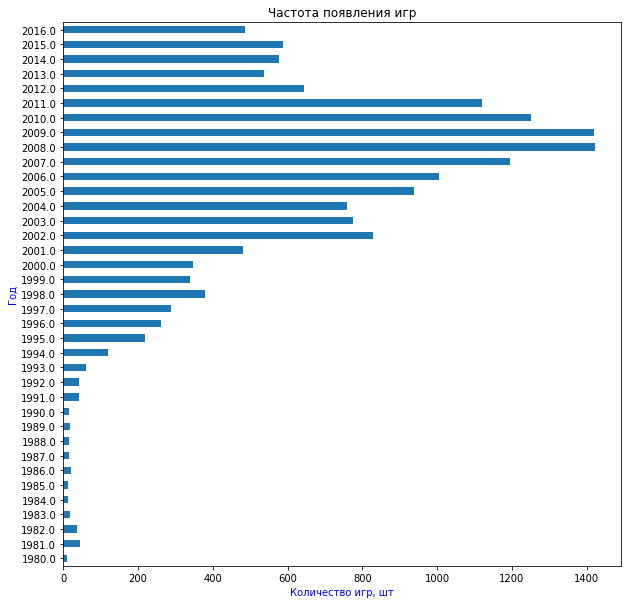

In [26]:
data_users['year_of_release'].value_counts().sort_index(ascending=True).plot.barh(title="Частота появления игр", figsize=(10, 10))
plt.ylabel("Год", fontsize=10, color='blue')
plt.xlabel("Количество игр, шт", fontsize=10, color='blue')
''

Из графика видно, что рост выпуска игр шел с 1985 по 2011 год, подом идет спад. Наибольшее количество новых игр на различных платформах вышло в период 2005-2011 года.

Изучим распределе продаж по платформам во времени. Для этого возьмем платформы с наибольшими общими продажами за все время.

,platform,sum_sales_all_region,persent_sales
0,PS2,1233.56,14.026318
1,X360,960.08,10.916686
2,PS3,929.32,10.566927
3,Wii,890.80,10.128931
4,DS,802.09,9.120245
5,PS,723.96,8.231860
6,GBA,312.88,3.557634
7,PS4,312.68,3.555359
8,PSP,289.49,3.291675
9,3DS,257.51,2.928043


Text(0.5, 0, 'Платформы')

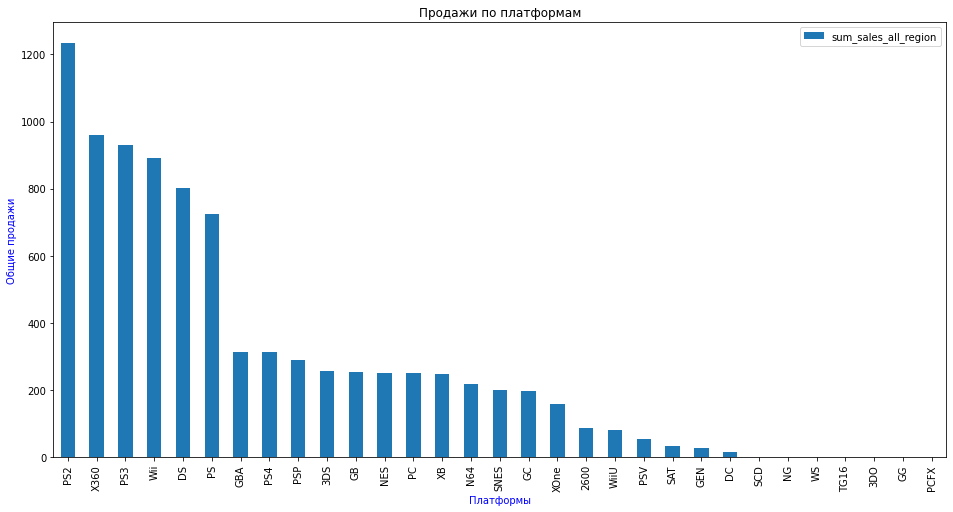

In [27]:
sales_platform = data_users.pivot_table(
                        index=['platform'],
                        values=['sum_sales_all_region'],
                        aggfunc='sum'
).sort_values(by='sum_sales_all_region', ascending=False).reset_index() 
sales_platform['persent_sales'] = sales_platform['sum_sales_all_region']/ sales_platform['sum_sales_all_region'].sum()*100
display(sales_platform)

sales_platform.sort_index(ascending=True).plot.bar(x='platform', y='sum_sales_all_region', title="Продажи по платформам", figsize=(16, 8))
plt.ylabel("Общие продажи", fontsize=10, color='blue')
plt.xlabel("Платформы", fontsize=10, color='blue')

Видно, что больше всего продаж приходится на игровые платформы: DS, PS,	PS2, PS3 Wii, X360.

Изучим данные продаж для 6 самых популярных платформ по годам. Составим таблицу продаж по годам для построения графиков.

In [28]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
big_sales_platform = data_users[data_users['platform'].isin(platforms)].pivot_table(
                                                                index=['year_of_release'],
                                                                columns = ['platform'],
                                                                values=['sum_sales_all_region'],
                                                                aggfunc='sum'
)
display(big_sales_platform)


sum_sales_all_region                                        
platform                          DS      PS     PS2     PS3     Wii    X360
year_of_release                                                             
1985.0                          0.02     NaN     NaN     NaN     NaN     NaN
1994.0                           NaN    6.03     NaN     NaN     NaN     NaN
1995.0                           NaN   35.96     NaN     NaN     NaN     NaN
1996.0                           NaN   94.44     NaN     NaN     NaN     NaN
1997.0                           NaN  135.16     NaN     NaN     NaN     NaN
1998.0                           NaN  167.43     NaN     NaN     NaN     NaN
1999.0                           NaN  144.53     NaN     NaN     NaN     NaN
2000.0                           NaN   96.08   39.17     NaN     NaN     NaN
2001.0                           NaN   35.59  166.43     NaN     NaN     NaN
2002.0                           NaN    6.67  205.38     NaN     NaN     NaN
2003.0                           NaN    2.07  184.31     NaN     NaN     NaN
2004.0                         17.27     NaN  211.81     NaN     NaN     NaN
2005.0                        130.14     NaN  160.66     NaN     NaN    8.25
2006.0                        119.81     NaN  103.42   20.96  137.15   51.62
2007.0                        146.94     NaN   75.99   73.19  152.77   95.41
2008.0                        144.62     NaN   53.90  118.37  171.26  135.26
2009.0                        119.54     NaN   26.40  130.89  206.91  120.29
2010.0                         85.02     NaN    5.64  142.17  127.95  169.98
2011.0                         26.18     NaN    0.45  156.47   59.39  143.63
2012.0                         11.01     NaN     NaN  107.35   21.71   99.74
2013.0                          1.54     NaN     NaN  112.76    8.59   88.23
2014.0                           NaN     NaN     NaN   47.35    3.75   34.74
2015.0                           NaN     NaN     NaN   16.21    1.14   11.41
2016.0                           NaN     NaN     NaN    3.60    0.18    1.52

В данных есть ошибочные данные, платформа DS появилась в 2004 году, и продаж по ней в 1985 году быть не могло. Исключим данные за 1985 год из таблицы для построения графиков. Построим в однной области графики по годам для всех платформ. 

''

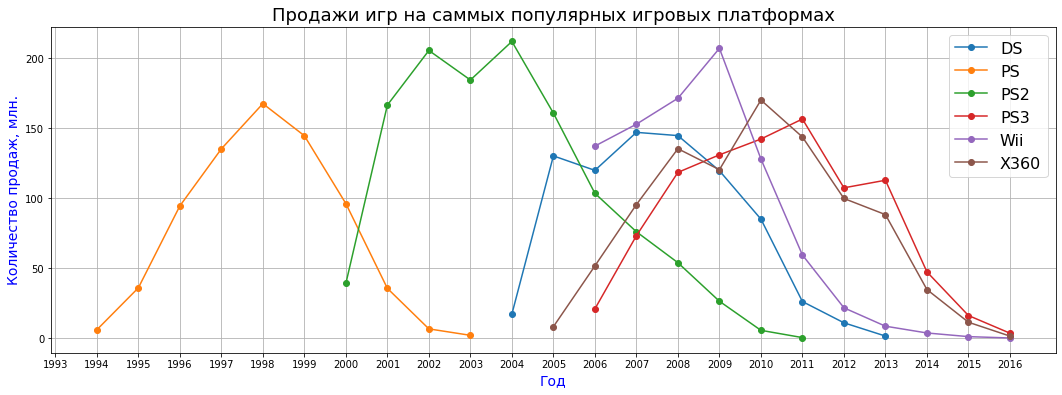

In [29]:
big_sales_platform = big_sales_platform[big_sales_platform.index > 1985] # исключаем ошибочное значение в 1985 году по платформе DS
big_sales_platform.plot(figsize=(18, 6), xlabel='Год', ylabel='Количество продаж, млн.', style='o-', grid=True)
plt.xticks(np.arange(1993, 2017, 1))
plt.legend(big_sales_platform.columns.get_level_values(1).tolist(), fontsize=16)
plt.xlabel('Год', fontsize=14, color='blue')
plt.ylabel('Количество продаж, млн.', fontsize=14, color='blue')
plt.title('Продажи игр на саммых популярных игровых платформах', fontsize=18)
''

Изучим медианное время жизни платформ по всему датасету. По графикам видно, что для самых популярных платформ время жизни может доходить до 10-11 лет, а период роста и стабилизации продаж до 5 лет.

In [30]:
time_life_platform = data_users.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life_platform['life'] = time_life_platform['max'] - time_life_platform['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life_platform['life'].median()

7.0

Среднее время жизни платформ составляет 7 лет. По графикам видно, что для самых популярных платформ время жизни может доходить до 10-11 лет, а период роста и стабилизации продаж до 5 лет.

Будем считать, что время жизни платформ 7 лет,а 3 года время роста и стабилизации продаж. Для построения прогноза продаж на 2017 год, возьмем данные за период 2014-2016 гг. (3 года). Это позволит увидеть как расстущие продажи по платформам, так падающие. Создадим датасет с данными только за 2014-2016 гг.

In [32]:
data_users_actual = data_users[data_users['year_of_release'] > 2013].copy()
data_users_actual.info()
data_users_actual.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 31 to 16441
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1650 non-null   object 
 1   platform              1650 non-null   object 
 2   year_of_release       1650 non-null   float64
 3   genre                 1650 non-null   object 
 4   na_sales              1650 non-null   float64
 5   eu_sales              1650 non-null   float64
 6   jp_sales              1650 non-null   float64
 7   other_sales           1650 non-null   float64
 8   sum_sales_all_region  1650 non-null   float64
 9   critic_score          687 non-null    float64
 10  user_score            852 non-null    float64
 11  rating                1650 non-null   object 
dtypes: float64(8), object(4)
memory usage: 167.6+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,sum_sales_all_region,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NotR
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,11.68,NaN,NaN,NotR
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,7.98,NaN,NaN,NotR


Рассмотрим продажи игр на разные игровые платформы по годам.

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,43.76,12.75,47.35,99.81,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,8.49,16.21,117.84,0.12,6.25,1.14,16.35,11.41,59.77
2016.0,15.14,5.03,3.60,69.04,NaN,4.25,0.18,4.60,1.52,25.74


''

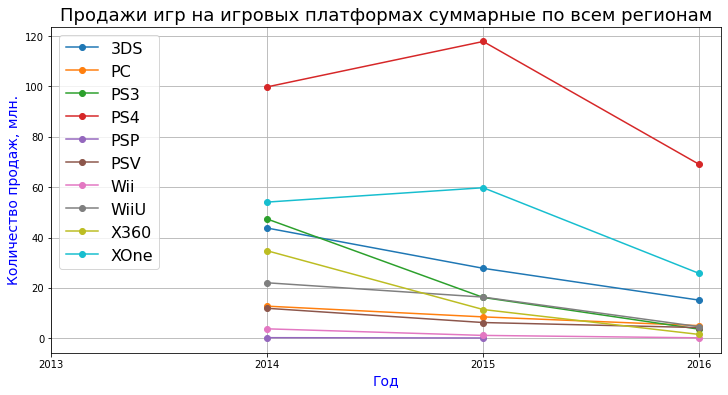

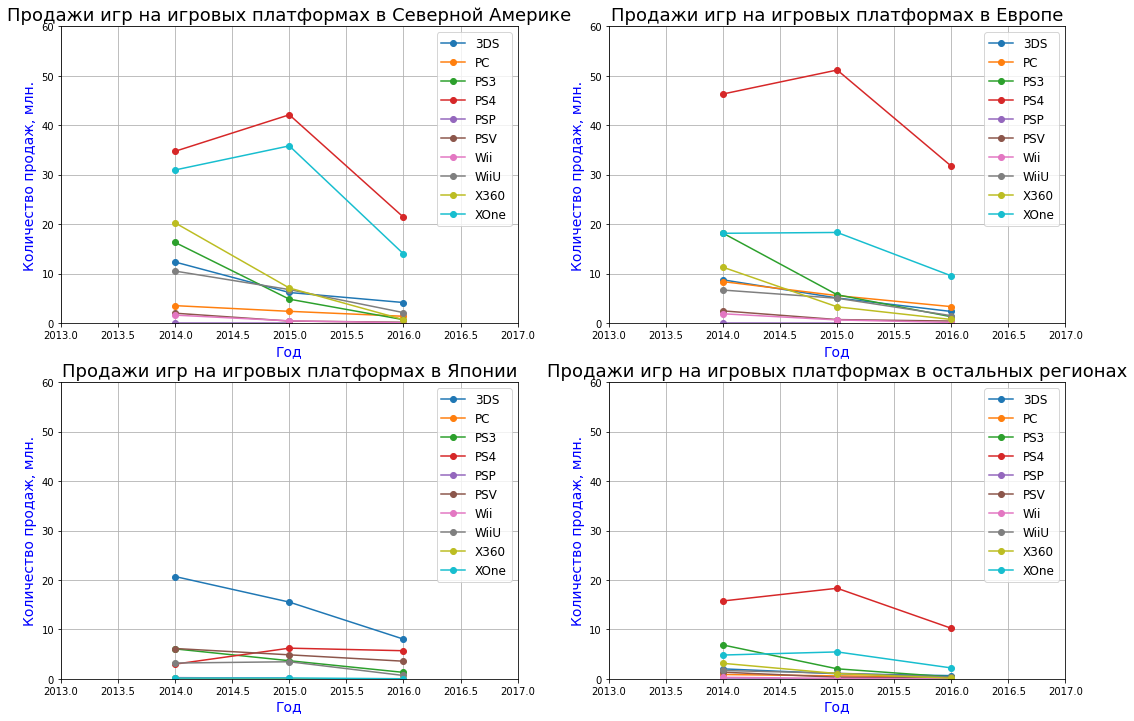

In [33]:
new_sales_platform = data_users_actual.pivot_table(
                            index=['year_of_release'],
                            columns = ['platform'],
                            values=['sum_sales_all_region'],
                            aggfunc='sum'
)
new_sales_platform.columns = new_sales_platform.columns.droplevel(0) #удалим первый уровень заголовков колонок
display(new_sales_platform)
new_sales_platform.plot(figsize=(12, 6), xlabel='Год', ylabel='Количество продаж, млн.', style='o-', grid=True)
plt.xticks(np.arange(2013, 2017, 1))
plt.legend(new_sales_platform.columns.tolist(), fontsize=16)
plt.xlabel('Год', fontsize=14, color='blue')
plt.ylabel('Количество продаж, млн.', fontsize=14, color='blue')
plt.title('Продажи игр на игровых платформах суммарные по всем регионам', fontsize=18)


fig, axs = plt.subplots(2, 2, figsize=(18, 12))

regions = {'na_sales' : 'Северной Америке', 'eu_sales' : 'Европе', 'jp_sales' : 'Японии', 'other_sales' : 'остальных регионах' }
k = 0
m = 0
for region in regions:
    data_users_actual.pivot_table(
                            index=['year_of_release'],
                            columns = ['platform'],
                            values=region,
                            aggfunc='sum'
    ).plot(ax=axs[m, k], xlabel='Год', ylabel='Количество продаж, млн.', style='o-', grid=True)

    axs[m, k].set_title('Продажи игр на игровых платформах в {}'.format(regions[region]), fontsize=18)
    axs[m, k].set_xlabel('Год', fontsize=14, color='blue')
    axs[m, k].set_ylabel('Количество продаж, млн.', fontsize=14, color='blue')
    axs[m, k].set_xlim([2013,2017])
    axs[m, k].set_ylim([0,60])
    axs[m, k].legend(new_sales_platform.columns.tolist(), fontsize=12)

    k += 1
    if k == 2:
        k = 0
        m = 1
        
''
''

В целом рынок продажи игр испытывает общий спад в сравнении с 2005-2011 годами.C 2014 до 2016 года наибольшие продажи игр были для платформ PS4 и XOne, но локальным исключением является Япония. Рынок Японии оличается от остальных регионов, на нем лидируют по продажам платформа 3DS, PS4 и PSV, а продажи для платформы XOne практический равны нулю. Но продажи игр на платформу 3DS по годам идут на спад  и рынок Японии по продажам меньше остальных регионов. В целом наиболее преспективными являются игровые платформы PS4 (лидирует по продажам во всех регионах) и XOne (лидирует по продажам в большенстве регионов), они появились в 2013 и  вероятно они могут иметь еще запас роста и стабилизации продаж, их предшественники имели большую популярность и долгий период жизни. Остальные платформы по продажам уверенно идут на спад и стремятся к нулю.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

''

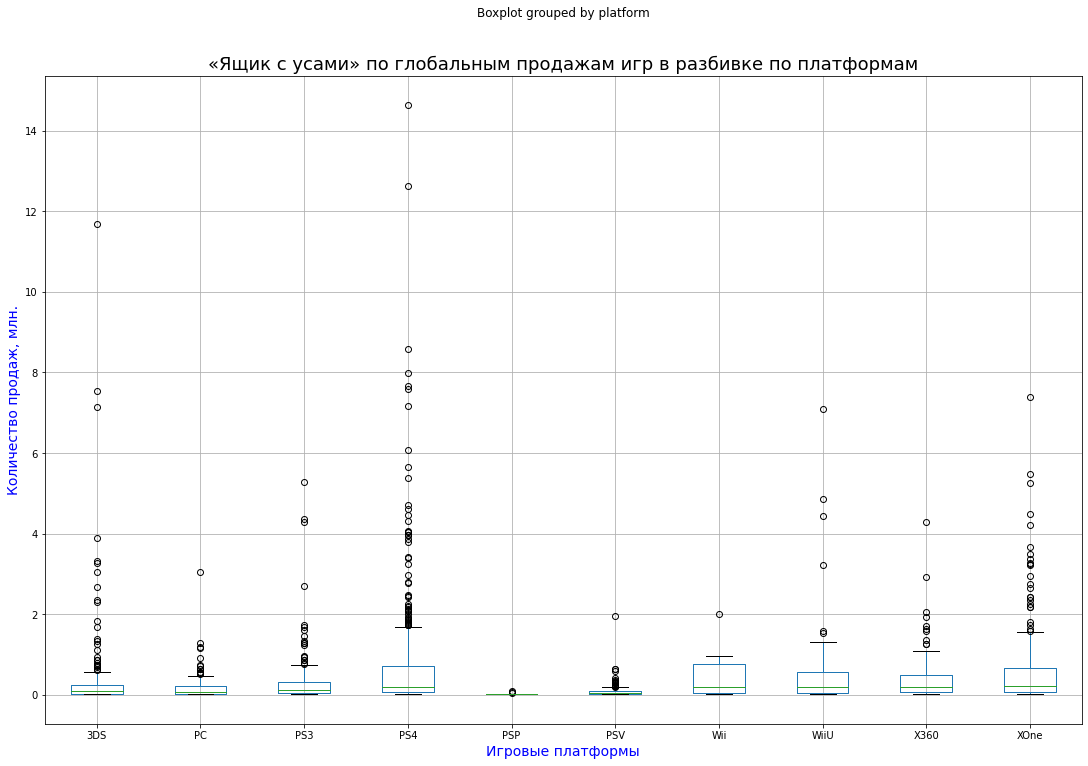

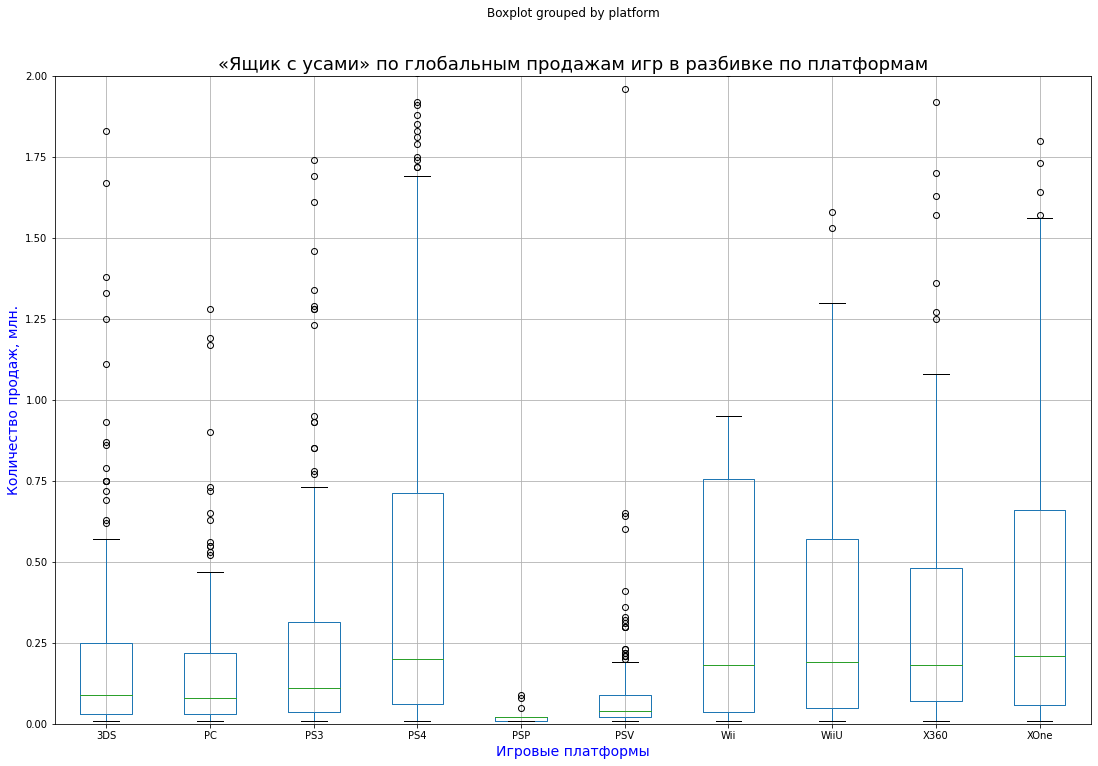

In [34]:
data_users_actual.boxplot(column='sum_sales_all_region', by='platform', figsize=(18, 12)) 
plt.xlabel('Игровые платформы', fontsize=14, color='blue')
plt.ylabel('Количество продаж, млн.', fontsize=14, color='blue')
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам', fontsize=18)

data_users_actual.boxplot(column='sum_sales_all_region', by='platform', figsize=(18, 12)) 
plt.xlabel('Игровые платформы', fontsize=14, color='blue')
plt.ylabel('Количество продаж, млн.', fontsize=14, color='blue')
plt.ylim([0, 2])
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам', fontsize=18)
''

XOne, PS4, Wii, WiiU и X360 показывает самые высокие медианные продажи, что указывает на их лидерство по объёму реализации. XOne, PS4, Wii имеют самый широкий межквартельный размах, что указывает на наибольшую валантильность продаж. Для высоких медианных продаж, наиболее симетричным является box  для X360, это показывает стабильность продаж. PS4, XOne и  ообладают наиболее высокими и стабильными продажами.

Создадим отдельный датасет с информацией только по PS4 и оценим влияние оценок критиков и пользователей на продажи. Построим отдельные диаграммы рассеяния продаж от оценки критиков и пользователей для игр вышедших в разыне года, добавим на графикик коэффициенты корреляции. 

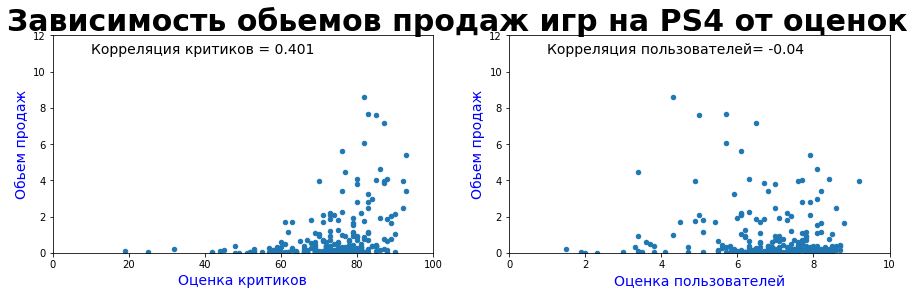

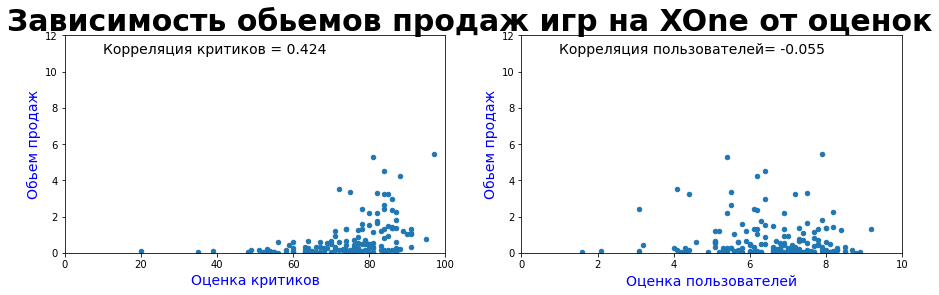

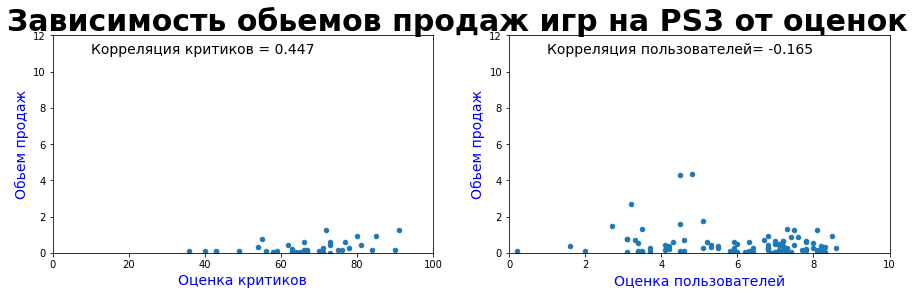

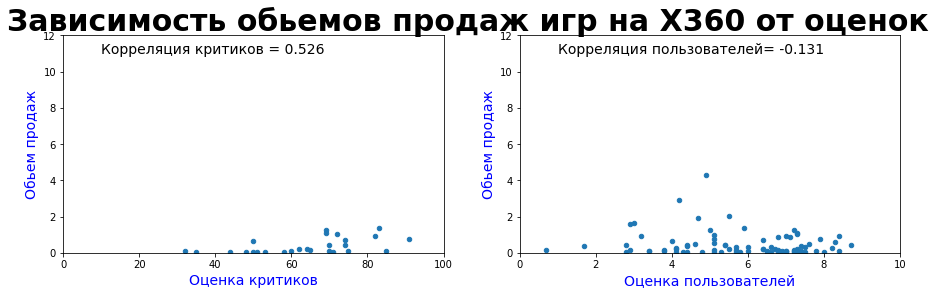

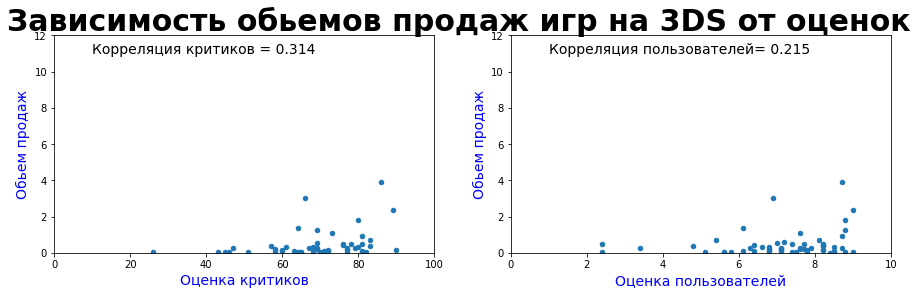

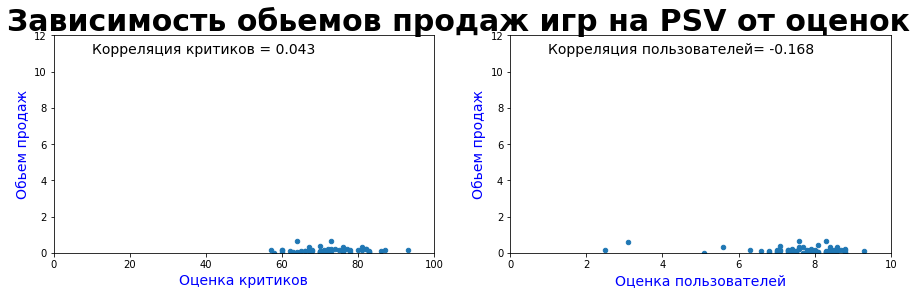

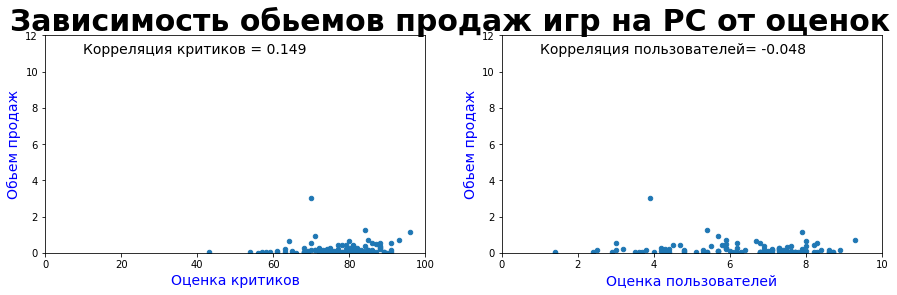

In [35]:
platform_list = ['PS4', 'XOne', 'PS3', 'X360', '3DS','PSV','PC']
for pl in platform_list:
    data_users_actual_pl = data_users_actual[data_users_actual['platform'] == pl]
    fig, axs = plt.subplots(1, 2, figsize=(15, 4))
    fig.suptitle('Зависимость обьемов продаж игр на {} от оценок'.format(pl), fontsize=30, weight='bold')
    data_users_actual_pl.plot(x='critic_score', y='sum_sales_all_region', kind='scatter',ax=axs[0])
    data_users_actual_pl.plot(x='user_score', y='sum_sales_all_region', kind='scatter',ax=axs[1])
    axs[0].set_xlabel('Оценка критиков', fontsize=14, color='blue')
    axs[0].set_ylabel('Обьем продаж', fontsize=14, color='blue')
    axs[0].set_xlim([0,100])
    axs[0].set_ylim([0,12])
    axs[0].text(10, 11, 'Корреляция критиков = {}'.format(data_users_actual_pl['sum_sales_all_region'].corr(data_users_actual_pl['critic_score']).round(3)), fontsize=14)
    axs[1].set_xlabel('Оценка пользователей', fontsize=14, color='blue')
    axs[1].set_ylabel('Обьем продаж', fontsize=14, color='blue')
    axs[1].set_xlim([0,10])
    axs[1].set_ylim([0,12])
    axs[1].text(1, 11, 'Корреляция пользователей= {}'.format(data_users_actual_pl['sum_sales_all_region'].corr(data_users_actual_pl['user_score']).round(3)), fontsize=14)
    ''


Видно, что хорошей корреляции по данным не прослеживается. Для популярных платформ можно отметить наличие корреляции между оценками критиков и обьемом продаж, при низких оценках критиков продажи низкие, а при высоких есть как низкие так и высокие. Корреляция между оценками пользователей и обьемом продаж отсутствует. Для платформ с низкой популярностью корреляция между оценками критиков/пользователей отсутствует.

Рассмотрим общее распределение игр по жанрам. 

''

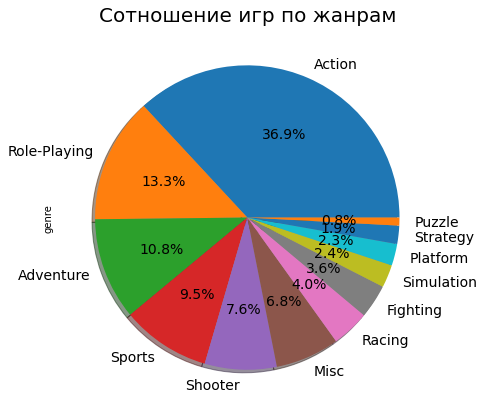

In [36]:
data_users_actual['genre'].value_counts().plot.pie(
    autopct='%1.1f%%',
    shadow=True,
    figsize=(7, 7),
    fontsize=14
)

plt.title('Сотношение игр по жанрам', fontsize=20)

""

Видно что наиболее частые жанры игр это : Action, Role-Playing, Adventure, sports, Misc, Shooter. Рассмотрим жанры с наибольшими продажами по годам и суммарно.

''

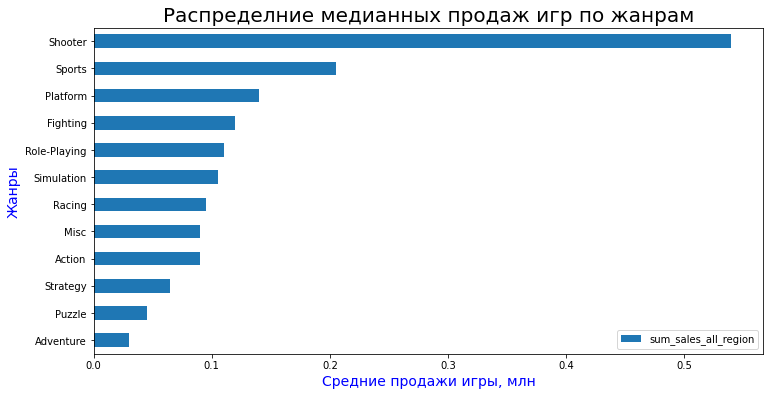

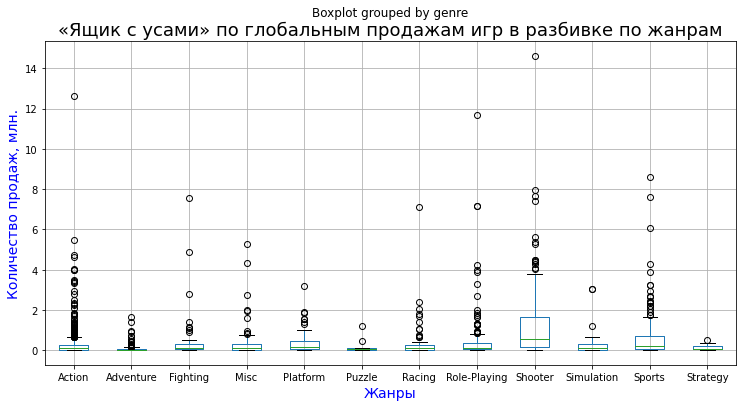

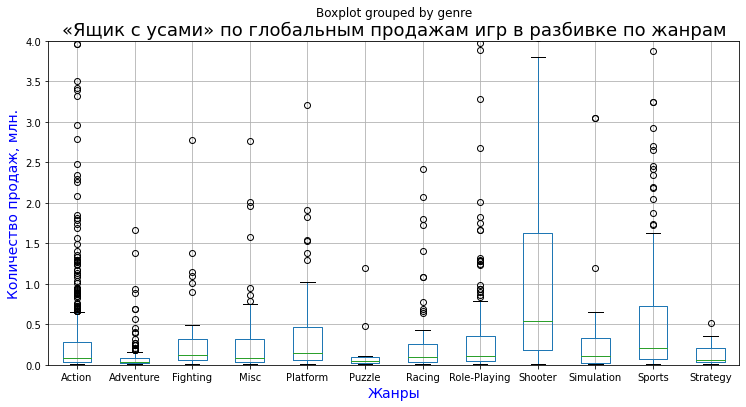

In [37]:
data_users_actual.pivot_table(
                            index=['genre'],
                            values=['sum_sales_all_region'],
                            aggfunc='median'                                        
).sort_values(['sum_sales_all_region'], ascending=[True]).plot.barh(figsize=(12, 6))

plt.title('Распределние медианных продаж игр по жанрам', fontsize=20)
plt.xlabel('Средние продажи игры, млн', fontsize=14, color='blue')
plt.ylabel('Жанры', fontsize=14, color='blue')

data_users_actual.boxplot(column='sum_sales_all_region', by='genre', figsize=(12, 6)) 
plt.xlabel('Жанры', fontsize=14, color='blue')
plt.ylabel('Количество продаж, млн.', fontsize=14, color='blue')
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по жанрам', fontsize=18)

data_users_actual.boxplot(column='sum_sales_all_region', by='genre', figsize=(12, 6)) 
plt.xlabel('Жанры', fontsize=14, color='blue')
plt.ylabel('Количество продаж, млн.', fontsize=14, color='blue')
plt.ylim([0, 4])
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по жанрам', fontsize=18)
''

Наиболее продаваемым является жанр Shooter. В Целом в первую четверку лидеров продаж входят : Shooter, Sports, Platform, Fighting. Больше всего выбросов у жанра Action, поэтому при рассмотрении суммарных продаж он может быть на первом месте.

В ходе исследования выявлено, что средняя продолжительность жизни платформ составляет 7 лет, для построения прогноза взяты данные за последние 3 года (2014-2016 гг.). Наиболее перспективными и лидирующими в последние годы являются платформы PS4 и XOne, кроме локального исключения на рынке Японии, где лидром является 3DS идущая на спад. PS4 и XOne появились в 2013 и вероятно они могут иметь еще запас роста и стабилизации продаж, их предшественники имели большую популярность и долгий период жизни. Для популярных платформ есть слабая корреляция между оценками критиков и обьемом продаж. Корреляция между оценками пользователей и обьемом продаж отсутствует не зависимо от популярности платформ. Наибольшее количество игр выпусскается в жанре Action, а наибольшие медианные продажи  у жанров Shooter, Sports, Platform, Fighting.

#### Шаг 4. Портрет пользователя каждого региона

Определим топ-5 самых популярных платформ для каждого региона.

''

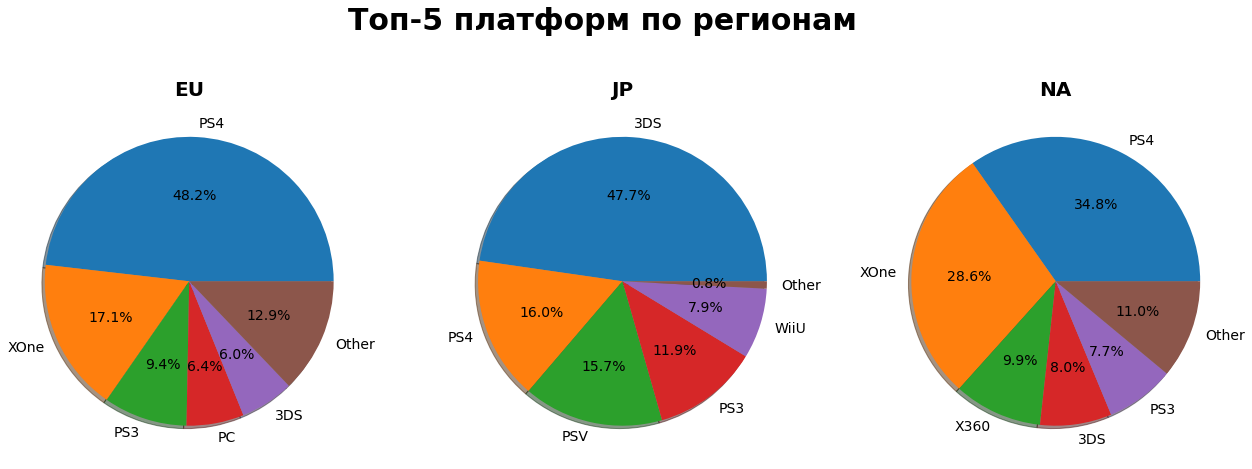

In [38]:
regions_list = ['eu_sales', 'jp_sales', 'na_sales']
rg = ['EU', 'JP', 'NA']

fig, axs = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle('Топ-5 платформ по регионам', fontsize=30, weight='bold')
k = 0

for region in regions_list:
    df_region_persent_g = data_users_actual.pivot_table(
                                index=['platform'],
                                values=region,
                                aggfunc='sum'                                        
    ).sort_values([region], ascending=[False]).reset_index()


    df_region_persent_g.loc[:4, 'A'] = df_region_persent_g.loc[:4, 'platform']
    df_region_persent_g.loc[5:, 'A'] = 'Other'
    df_region_persent_g = df_region_persent_g.pivot_table(
                                index=['A'],
                                values=region,
                                aggfunc='sum'                                        
    ).sort_values([region], ascending=[False])

    gen = df_region_persent_g[df_region_persent_g.index == 'Other']
    df_region_persent_g.drop(df_region_persent_g[df_region_persent_g.index == 'Other'].index, inplace=True)
    df_region_persent_g = df_region_persent_g.append(gen)

    df_region_persent_g.plot.pie(
                                y=region,
                                autopct='%1.1f%%',
                                shadow=True,
                                fontsize=14,
                                legend=False,
                                ylabel='',
                                ax=axs[k]
    )
    axs[k].set_title(rg[k], fontsize=20, weight='bold')
    k += 1
''

В топ-5 самых популярных платформ в разных регионах входят :PS3, PS4, XOne, X360, 3DS, PSV, PC, WiiU. В зависимости от региона платформы различаются по популярности, более кординально от остальных отличается Япония, в то же время она является самым маленьким рынком из исследуемых. Наибольшей популярностью в Японии пользуются платформы 3DS, PS4, PSV, в Европе PS4, XOne, PS3 и Северной Америке PS4, XOne, X360.

Определим топ-5 самых популярных жанров.

''

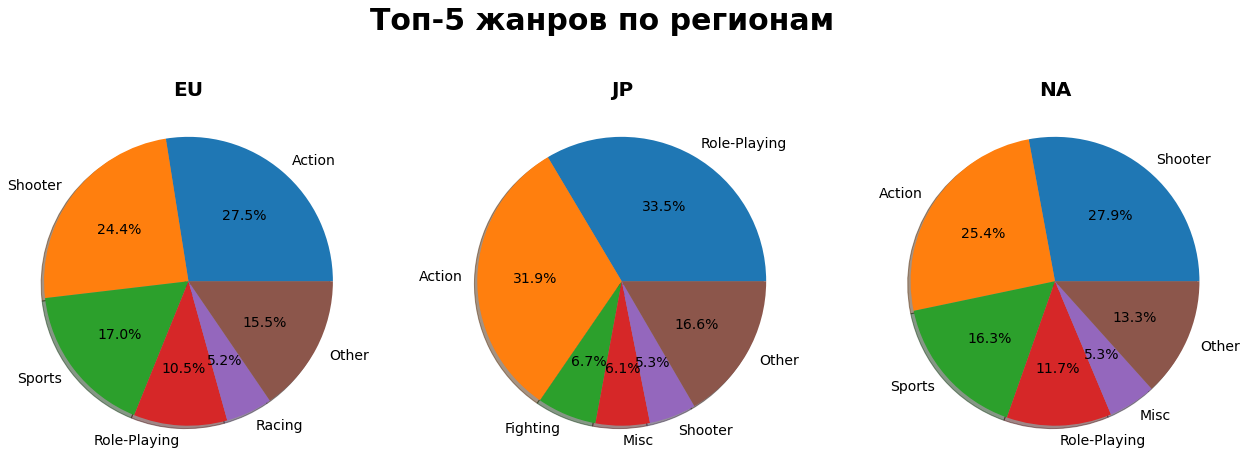

In [39]:
regions_list = ['eu_sales', 'jp_sales', 'na_sales']
rg = ['EU', 'JP', 'NA']

fig, axs = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle('Топ-5 жанров по регионам', fontsize=30, weight='bold')
k = 0

for region in regions_list:
    df_region_persent_g = data_users_actual.pivot_table(
                                index=['genre'],
                                values=region,
                                aggfunc='sum'                                        
    ).sort_values([region], ascending=[False]).reset_index()


    df_region_persent_g.loc[:4, 'A'] = df_region_persent_g.loc[:4, 'genre']
    df_region_persent_g.loc[5:, 'A'] = 'Other'
    df_region_persent_g = df_region_persent_g.pivot_table(
                                index=['A'],
                                values=region,
                                aggfunc='sum'                                        
    ).sort_values([region], ascending=[False])

    gen = df_region_persent_g[df_region_persent_g.index == 'Other']
    df_region_persent_g.drop(df_region_persent_g[df_region_persent_g.index == 'Other'].index, inplace=True)
    df_region_persent_g = df_region_persent_g.append(gen)

    df_region_persent_g.plot.pie(
                                y=region,
                                autopct='%1.1f%%',
                                shadow=True,
                                fontsize=14,
                                legend=False,
                                ylabel='',
                                ax=axs[k]
    )
    axs[k].set_title(rg[k], fontsize=20, weight='bold')
    k += 1
''

В топ-5 самых популярных жанров в разных регионах входят :Action, Shooter, Sports, Role-Playing, Racing	, Misc, Fighting. В зависимости от региона жанры различаются по популярности, более кординально от остальных отличается Япония, в то же время она является самым маленьким рынком из исследуемых. Наибольшей популярностью в Японии пользуются жанры Role-Playing, Action и Fighting, а в Европе и Северной Америке Action, Shooter и Sports.

Оценим влиянее рейтинга ESRB на продажи в отдельных регионах.

''

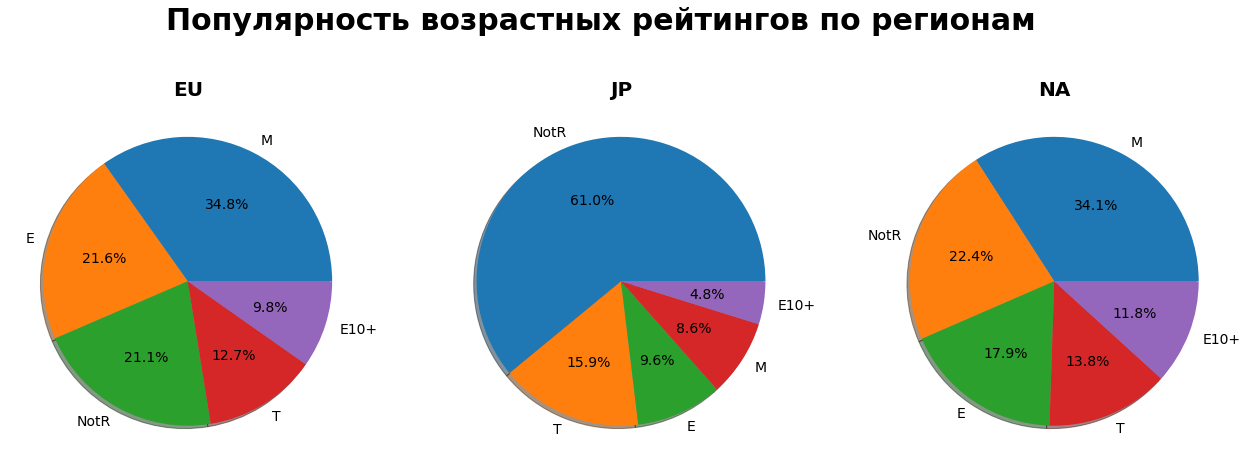

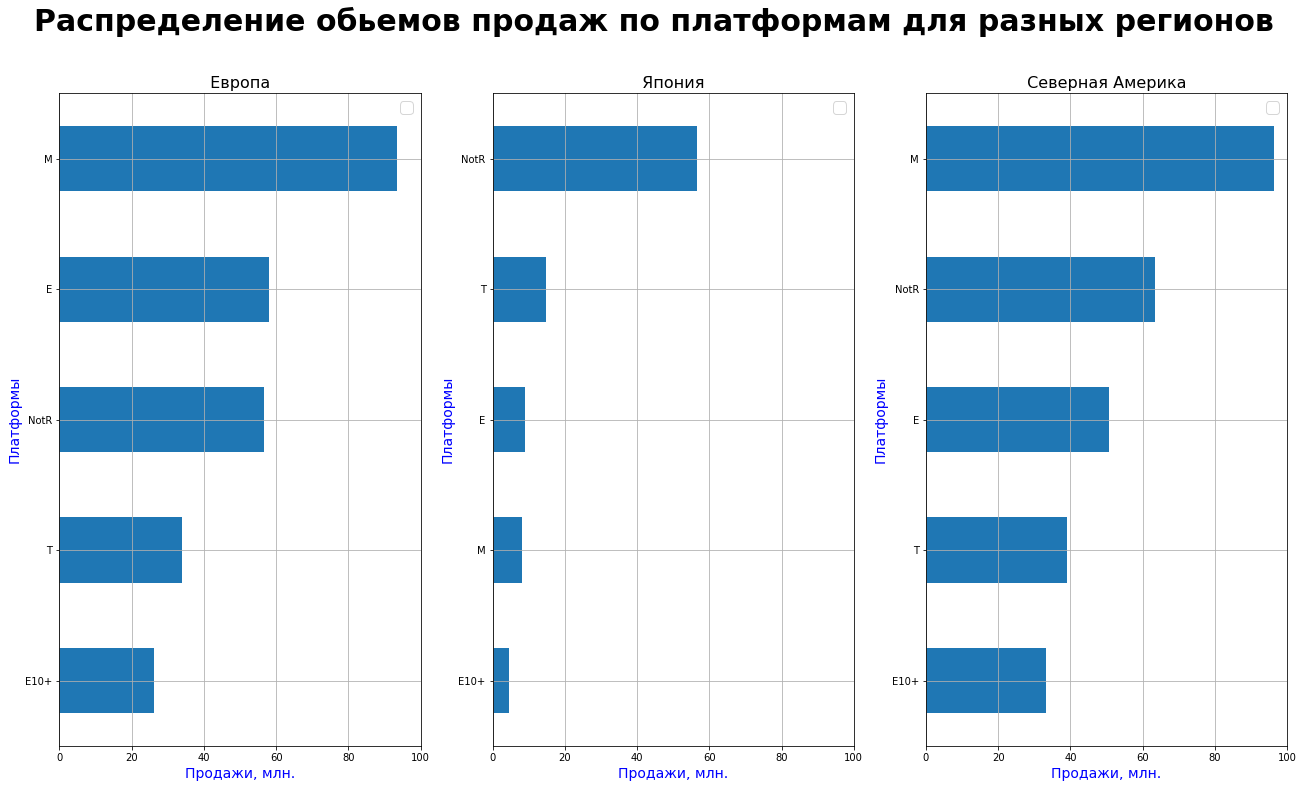

In [40]:
regions_list = ['eu_sales', 'jp_sales', 'na_sales']
rg = ['EU', 'JP', 'NA']

fig, axs = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle('Популярность возрастных рейтингов по регионам', fontsize=30, weight='bold')
k = 0

for region in regions_list:
    df_region_persent_g = data_users_actual.pivot_table(
                                index=['rating'],
                                values=region,
                                aggfunc='sum'                                        
    ).sort_values([region], ascending=[False])



    df_region_persent_g.plot.pie(
                                y=region,
                                autopct='%1.1f%%',
                                shadow=True,
                                fontsize=14,
                                legend=False,
                                ylabel='',
                                ax=axs[k]
    )
    axs[k].set_title(rg[k], fontsize=20, weight='bold')
    k += 1

regions_list = ['eu_sales', 'jp_sales', 'na_sales']
regions = {'eu_sales' : 'Европа', 'jp_sales' : 'Япония', 'na_sales': 'Северная Америка', 'sum_sales_all_region' : 'остальной мир'}



data_users_actual_platforms_r = data_users_actual.pivot_table(
                            index=['rating'],
                            values=regions,
                            aggfunc='sum'                                        
)

df_region_persent_r = data_users_actual_platforms_r

k = 0
fig, axs = plt.subplots(1, 3, figsize=(22, 12))
fig.suptitle('Распределение обьемов продаж по платформам для разных регионов', fontsize=30, weight='bold')

for region in regions_list :
    data_users_actual_platforms_r.sort_values([region], ascending=[True]).plot.barh(y=region,use_index=True,grid=True, ax=axs[k])
    axs[k].set_title(' {} '.format(regions[region]), fontsize=16)
    axs[k].set_xlabel('Продажи, млн.', fontsize=14, color='blue')
    axs[k].set_ylabel('Платформы', fontsize=14, color='blue')
    axs[k].legend('',loc='best', fontsize=16)
    axs[k].set_xlim([0,100])

    
    k += 1

''

Наибольшее количество продаж в Европе и Северной америке приходится на возрастные категории M (для лиц старше 17 лет), E (для всех возрастных категорий) и "Без рейтинга". В японии  наиболее популярны игры с возрастной категорией "Без рейтинга", далее идут T (для лиц старше 13 лет) и E (для всех возрастных категорий). В Японии основной обьем продаж приходится на игры выпущенные не в Северной и Центральной Америке, а вероятно в Японии.

#### Шаг 5. Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC.


Сформулируем нулевую гипотезу так: Средние пользовательские рейтинг платформ Xbox One и PC равны. 

Альтернативная гипотеза будет двусторонняя:  Средние пользовательский рейтинги платформы Xbox One больше или меньше платформы PC.

Применим scipy.stats.ttest_ind, так как у нас 2 независимые выборки и проверяеся равенство средних двух генеральных совокупностей.

In [42]:
xone = data_users_actual[data_users_actual['platform'] == 'XOne'].dropna(subset=['user_score'])
pc = data_users_actual[data_users_actual['platform'] == 'PC'].dropna(subset=['user_score'])

print('Средний пользовательский рейтинг платформы XOne:', data_users_actual[data_users_actual['platform'] == 'XOne']['user_score'].mean())
print('Средний пользовательский рейтинг платформы PC:', data_users_actual[data_users_actual['platform'] == 'PC']['user_score'].mean())


alpha = 0.05# уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False, alternative='two-sided')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средний пользовательский рейтинг платформы XOne: 6.551572327044026
Средний пользовательский рейтинг платформы PC: 6.220183486238532
p-value: 0.09937492993342421
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, значит с высокой вероятностю средние пользовательские рейтинги платформ Xbox One и PC равны.

Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую гипотезу так: Средние пользовательские рейтинги жанров Action и Sports равны. 

Альтернативная гипотеза будет двусторонняя:  Средние пользовательский рейтинг жанра Action больше или меньше жанра Sports.

Применим scipy.stats.ttest_ind, так как у нас 2 независимые выборки и проверяеся равенство средних двух генеральных совокупностей.

In [43]:
action = data_users_actual[data_users_actual['genre'] == 'Action'].dropna(subset=['user_score'])
sports = data_users_actual[data_users_actual['genre'] == 'Sports'].dropna(subset=['user_score'])

print('Средний пользовательский рейтинг жанра Action:', data_users_actual[data_users_actual['genre'] == 'Action']['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports:', data_users_actual[data_users_actual['genre'] == 'Sports']['user_score'].mean())

alpha = 0.05# уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False, alternative='two-sided')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средний пользовательский рейтинг жанра Action: 6.743205574912893
Средний пользовательский рейтинг жанра Sports: 5.208943089430894
p-value: 4.641310807975389e-14
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, значит cредние пользовательские рейтинги жанров Action и Sports разные.

Так как у нас были 2 независимые выборки то производилась проверка равенство средних двух генеральных совокупностей. Нулевая гипотеза формировалась из предположения что средние дву совокупностей равны. Альтернативная гипотеза была в обоих случаях двусторонней, так как стоял вопрос только о их равенстве или не равестве, независимо от того среднее какой совокупности больше или меньше. Альтернативная гипотеза заключалась в том что средние двух совокупностей не равны. Исходя из результатов теста, если pvalue была больше статистической погрешности, то принималась нулевая гипотеза о равенстве, если pvalue была меньше статистической погрешности, то нулевая гипотеза отвергалась и принималась альтернативная о неравенстве средних двух генеральных совокупностей.

#### Общий вывод

<span style="font-size: 18px;"><u><i>Задачей данного исследования было проанализировать исторические данные продаж игр до 2016 года , выявить закономерности успеха игр и подготовить рекомендации для планирования компании на 2017 год. Также надо было проверить несколько гипотез. Было проведено исследование датафрейма , данные  которого насчитывали 16715 строк. В датасете присутствовали данные о: названии игр, игровой платформе, годе выхода, жанре, продажах в разных странах, оценках критиков и пользователей и возрастном рейтинге. 
</u></i>  </span>

<span style="font-size: 18px;"><i> В ходе выполнения исследования были выполнены следующие действия: </i></span> 
<span style="font-size: 18px;"><i>
1. Изучена общая информация из датафрейма;
    
    
2. Данные подготовлены для исследовательского анализа. Названия столбцов приведены к нижнему регистру, убраны неявные дубликаты , удалены строчки с пустыми значениями в названиях, годах и статистически незначимые. Отсутствующие значения в колонке возрастного рейтинга заполнены "заплаткой" для дальнейшего. Добавлен столбец суммарных продаж по всем регионам.Проведена проверка на наличие явных дубликатов, их нет.
    
    
3. Оценен общий обьем выпуска игр в разные годы.  
    Изучены данные продаж для 5 самых популярных платформ по годам, выявлено что в среднем продажи на различных игровых платформах длятся 7 лет. Для дальнейшего анализа и построения прогноза продаж на 2017 год, были взяты данные за период 2014-2016 гг. (3 года).
    Выявлены перспективные платформы PS4 и XOne,. Для более гллубокого анализа продажпо различным платформам были построены графики «ящик с усами», PS4, XOne и  ообладают наиболее высокими и стабильными продажами. Проведен анлиз на наличие корреляции между оценками критков и пользователей и обьемом продаж игр, выявлено наличие слабой корреляции оценок критиков и обьемов продвж на популярных платформах. Было оценено распределение количества выпущенных игр по их жанрам, наибольшие :  Action, Role-Playing, Adventure, sports, Misc, Shooter. Определены наиболее продаваемые жанры игр : Shooter, Sports, Platform, Fighting.
    
    
4. Проведена оценка портрета пользователей для каждого региона по которым были данные ( Япония, Северная Америка и Европа)
    
   Определили топ-5 самых популярных платформ для каждого региона. В топ-5 самых популярных платформ в разных регионах входят :PS3, PS4, XOne, X360, 3DS, PSV, PC, WiiU. В зависимости от региона платформы различаются по популярности, более кординально от остальных отличается Япония, в то же время она является самым маленьким рынком из исследуемых. Наибольшей популярностью в Японии пользуются платформы 3DS, PS4, PSV, в Европе PS4, XOne, PS3 и Северной Америке PS4, XOne, X360.
    
   Определили топ-5 самых популярных жанров для каждого региона. В топ-5 самых популярных жанров в разных регионах входят :Action, Shooter, Sports, Role-Playing, Racing	, Misc, Fighting. В зависимости от региона жанры различаются по популярности, более кординально от остальных отличается Япония, в то же время она является самым маленьким рынком из исследуемых. Наибольшей популярностью в Японии пользуются жанры Role-Playing, Action и Fighting, а в Европе и Северной Америке Action, Shooter и Sports.
    
   Оценили влияние рейтинга ESRB на продажи в отдельных регионах. Наибольшее количество продаж в Европе и Северной америке приходится на возрастные категории M (для лиц старше 17 лет), E (для всех возрастных категорий) и "Без рейтинга". В японии  наиболее популярны игры с возрастной категорией "Без рейтинга", далее идут T (для лиц старше 13 лет) и E (для всех возрастных категорий). В Японии основной обьем продаж приходится на игры выпущенные не в Северной и Центральной Америке, а вероятно в Японии.
    
        
5. Проведена проверка гипотез:
    - о равенстве средних пользовательских рейтингов платформ Xbox One и PC;
    - об отличии средних пользовательских рейтингов жанров Action и Sports.
        
    Были выполнены t-тесты на равенство двух независимых выборок. По их результатам сделаны выводы:
    - с высокой вероятностю средние пользовательские рейтинги платформ Xbox One и PC равны;
    - cредние пользовательские рейтинги жанров Action и Sports разные.
    
    
6. Подготовлен общий вывод.
</i></span>



<span style="font-size: 22px;"><u><i> Вывод:</i>  </span>
    
1. Выявлено, что наиболее преспективными являются игровые платформы PS4 и XOne.
    
    
2. Лучше продаются игры с высокими оценками критиков.
    
    
3. В лидеры продаж по жанрам входят: Shooter, Sports, Platform, Fighting.
    
    
4. Наиболее популярными платформами являются:
    - Япония - 3DS, PS3, PSP; 
    - Европа - PS4, XOne, PS3.
    - Северная Америка - PS4, XOne, X360.
    
5. Наиболее популярными жанрами являются:
    - Япония - Role-Playing, Action, Fighting; 
    - Европа и Северная Америка - Action, Shooter, Sports.    
    
6. Наиболее популярными рейтингами являются:
    - Япония - самая популярная категория "Без рейтинга", далее идут T (для лиц старше 13 лет) и E (для всех возрастных категорий); 
    - Европа и Северная Америка -  M (для лиц старше 17 лет), E (для всех возрастных категорий) и "Без рейтинга". 

    
7. Обьем рынка игр в Японии значительно меньше чем в остальных регионах.
    
    
<span style="font-size: 22px;"><u><i> Рекомендации:</i>  </span>
    
В 2017 году рекомендуется направить фокус вниманияя на платформы PS4 и XOne, как на наиболее перспективные. Увеличивать обьемы предложений игр с высоким рейтингом в жанрах: Shooter, Sports, Platform, Fighting. На рынках Европы и Северной Америки отдавать предпочтения играм с возрастным рейтингом M (для лиц старше 17 лет) и E (для всех возрастных категорий) в жанрах Action, Shooter, Sports для платформ PS3, PS4, Xbox 360, XOne, а на рынке Японии отдавать предпочтения играм без рейтинга (скорее всего местным и произведенным не в Центарльной и Северной Америке), T (для лиц старше 13 лет) и E (для всех возрастных категорий) в жанрах Role-Playing, Action, Fighting для платформ 3DS, PS3, PSV, PS4. Учиывать данные рекомендации при проведении рекламных и промоакций, а также настройке автоматических рекомендаций.